# Tarea 2. NNBackPropagation_ generalización para ejercicio de clase

## Fundamentos de inteligencia computacional
## por: Juan Pablo Arango A. & Simón Zapata Caro

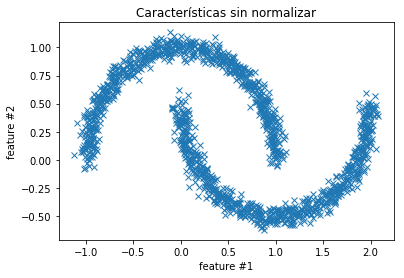

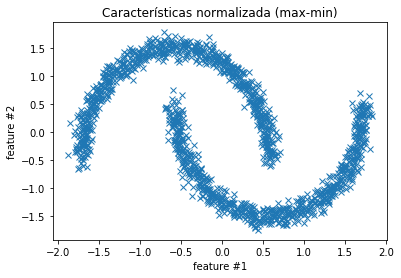

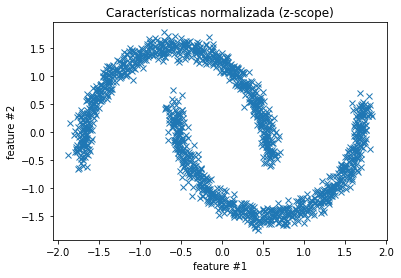

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

X = noisy_moons[0]
y = noisy_moons[1]

#normalización de la variable de entrada
X_original = 0*X
X1         = 0*X

X_original[:,0] = X[:,0]
X_original[:,1] = X[:,1]
#normalización tipo max-min
X1[:,0]  = (X_original[:,0]-min(X_original[:,0]))/(max(X_original[:,0])-min(X_original[:,0]))
X1[:,1]  = (X_original[:,1]-min(X_original[:,1]))/(max(X_original[:,1])-min(X_original[:,1]))

X[:,0] = (X_original[:,0]-np.mean(X_original[:,0]))/(np.std(X_original[:,0]))
X[:,1] = (X_original[:,1]-np.mean(X_original[:,1]))/(np.std(X_original[:,1]))

plt.plot(X_original[:,0], X_original[:,1], 'x')
plt.title('Características sin normalizar')
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.show()
plt.plot(X[:,0], X[:,1], 'x')
plt.title('Características normalizada (max-min)')
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.show()
plt.plot(X[:,0], X[:,1], 'x')
plt.title('Características normalizada (z-scope)')
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.show()

In [2]:
y.shape

(1500,)

In [46]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def clearList(L): #arroja una lista de L elementos vacios, no sabia de qué otra forma hacerla
    listica = []
    for i in range(0,L):
        listica.append([]);
    return listica

def RedNeuronalTrain(X,y,Lsizes,alpha = .1,epochs = 20,outputs = 2):
    N  = X.shape[0]   #número de muestras para realizar el entrenamiento
    nf = X.shape[1]   #número de características
    L = len(Lsizes)   #número de capas ocultas
    w_ = []           #pesos de la red neuronal
    
    w_.append(np.random.rand(Lsizes[0],nf+1)) #Primera capa: L_1 filas & nf + 1 columnas (añadiendo la neurona de BIAS)
    for k in range(0,L-1):
        w_.append(np.random.rand(Lsizes[k+1],(Lsizes[k]+1)))#capa siguiente en las filas y capa actual columnas
    w_.append(np.random.rand(outputs,Lsizes[L-1]+1))        #Ultima capa interna: ourput_N flas & L_final columnas 
                                                            #(añadiendo la neurona de BIAS) 
    for j in range(0,epochs): #condición de parada
        J = 0                 #error cuadratico medio  
        for i in range(0,N): #falta mirar como carajos quitas este ciclo, si es que si se puede
            #One hot encoding
            Y = np.zeros(shape=(outputs,1))
            Y[y[i]] = 1
            a_ = []
            z_ = []
            #Forward
            #Para cada muestra
            a_.append(X[i,None].T)
            #Se agrega el bias de la capa entrada
            for k in range(0,(L+1)):
                #Se agrega el bias a la capa externa k+1
                a_[k] = np.insert(a_[k], 0, 1,axis=0)
                z_.append(np.dot(w_[k],a_[k]))
                a_.append(sigmoid(z_[k]))
                
            #Backward
            J = J + np.dot((Y-a_[len(a_)-1]).T,(Y-a_[len(a_)-1]))
            d_=clearList(len(a_))
            
            d_[L+1]= (Y-a_[L+1])*d_sigmoid(z_[L])
            for k in range(L,0,-1):
                d_[k] = np.dot(w_[k].T,d_[k+1])
                d_[k] = np.delete(d_[k],0,axis=0)
                d_[k] = d_[k]*d_sigmoid(z_[k-1])
                
            DE_dw_=clearList(len(w_))
            for k in range(0,len(w_)):
                DE_dw_[k] = -np.dot(d_[k+1],a_[k].T)
            for k in range(0,len(w_)):
                w_[k] = w_[k]-alpha*DE_dw_[k]
        print(J/2)
    return w_

def Predict(X,w_): 
    #Forward
    #Para cada muestra
    L = len(w_)
    a_ = []
    z_ = []
    a_.append(X[:,None])
    for k in range(0,(L)):
        #Se agrega el bias a la capa externa k+1
        a_[k] = np.insert(a_[k], 0, 1,axis=0)
        z_.append(np.dot(w_[k],a_[k]))
        a_.append(sigmoid(z_[k]))
    return a_[len(a_)-1]


### Entrenamiento usando muestras normalizadas con min-max

In [47]:
Nsamples = X1.shape[0]
Ntrain = int(0.7*Nsamples)
Nval   = int(1.0*Nsamples)
Ntest  = Nsamples-Ntrain-Nval

X_train = X1[0:Ntrain,:]
X_val   = X1[Ntrain:(Ntrain+Nval),:]
X_test  = X1[(Ntrain+Nval):Nsamples,:]
y_train = y[0:Ntrain]
y_val   = y[Ntrain:(Ntrain+Nval)]
y_test  = y[(Ntrain+Nval):Nsamples]

In [48]:
sizes  = np.array([8,16])
w_ = RedNeuronalTrain(X=X_train,y=y_train,Lsizes=sizes,outputs=2,epochs=30)#Lsizes es sin contar la neurona de BIAS
w_1 = w_

[[444.55704655]]
[[402.61122721]]
[[402.51994762]]
[[402.40010051]]
[[402.23176636]]
[[401.97369139]]
[[401.52911189]]
[[400.63941532]]
[[398.56759326]]
[[393.30059538]]
[[378.93297564]]
[[349.46049211]]
[[325.93522588]]
[[316.55453968]]
[[193.09215189]]
[[109.13504423]]
[[98.31987076]]
[[95.04695316]]
[[93.71285913]]
[[93.10458724]]
[[92.80896489]]
[[92.6534351]]
[[92.56050351]]
[[92.49420927]]
[[92.43759365]]
[[92.38268343]]
[[92.3258633]]
[[92.2656638]]
[[92.20167409]]
[[92.13399762]]


In [49]:
predicted = []
for i in range(0,X_train.shape[0]):
    predicted.append(np.argmax(Predict(X_train[i],w_)))
Accuracy_train = np.sum(np.array(predicted) == y_train)/X_train.shape[0]
print('error de entrenamiento = '+str(Accuracy_train))

error de entrenamiento = 0.878095238095238


In [50]:
predicted = []
for i in range(0,X_val.shape[0]):
    predicted.append(np.argmax(Predict(X_val[i],w_)))
Accuracy_val = np.sum(np.array(predicted) == y_val)/X_val.shape[0]
print('error de validación = '+str(Accuracy_val))

error de validación = 0.8933333333333333


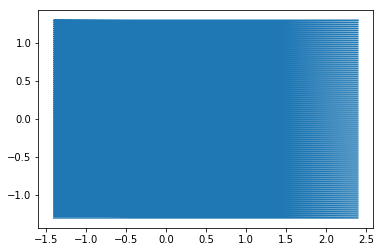

In [51]:
x1 = np.linspace(-1.4,2.4,1000)
x2 = np.linspace(-1.3,1.3,100)
x1, x2 = np.meshgrid(x1, x2,indexing='xy')

x1 = x1.reshape((x1.shape[0]*x1.shape[1], 1))
x2 = x2.reshape((x2.shape[0]*x2.shape[1], 1))

plt.plot(x1,x2)
plt.show() #Estamos llenando la superficie de puntos, para luego evaluarlos en la red neuronal

Xnew = np.concatenate((x1,x2),axis=1)

In [52]:
X_norm = (Xnew-np.mean(X_original,axis=0))/(np.std(X_original,axis=0))
predicted = []
for i in range(0,Xnew.shape[0]):
    predicted.append(np.argmax(Predict(X_norm[i],w_)))


In [53]:
n1 = []
n2 = []
for i in range(0,X_norm.shape[0]):
    if predicted[i]==0:
        n1.append(i)
    else:
        n2.append(i)

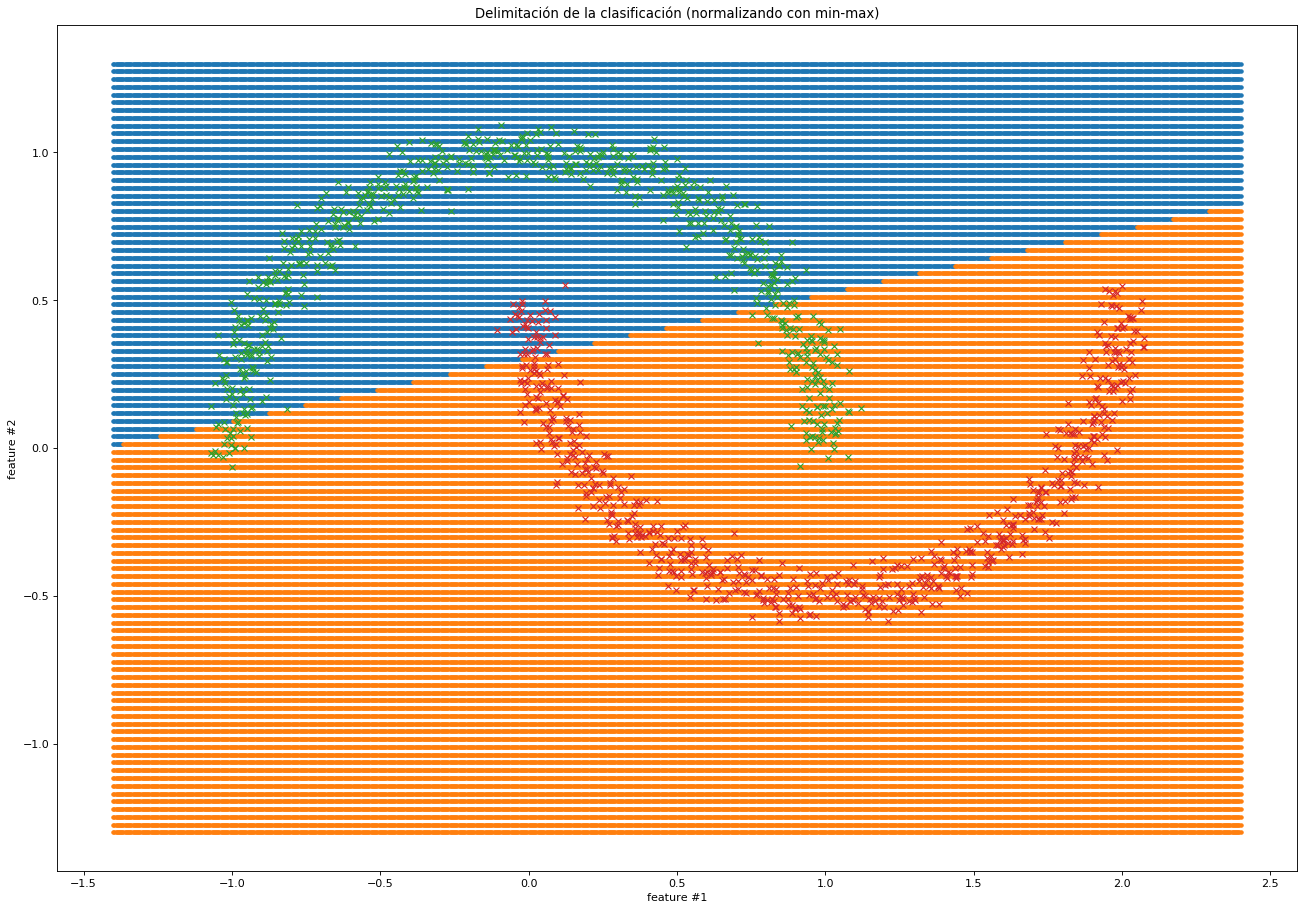

In [54]:
plt.figure(figsize=(20, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(Xnew[n1,0],Xnew[n1,1],'.')
plt.plot(Xnew[n2,0],Xnew[n2,1],'.')
plt.plot(X_original[y==0,0], X_original[y==0,1], 'x')
plt.plot(X_original[y==1,0], X_original[y==1,1], 'x')
plt.title('Delimitación de la clasificación (normalizando con min-max)')
plt.xlabel('feature #1')
plt.ylabel('feature #2')

plt.show()



### Entrenamiento usando muestras normalizadas con Z-scope

In [55]:
Nsamples = X.shape[0]
Ntrain = int(0.7*Nsamples)
Nval   = int(1.0*Nsamples)
Ntest  = Nsamples-Ntrain-Nval

X_train = X[0:Ntrain,:]
X_val   = X[Ntrain:(Ntrain+Nval),:]
X_test  = X[(Ntrain+Nval):Nsamples,:]
y_train = y[0:Ntrain]
y_val   = y[Ntrain:(Ntrain+Nval)]
y_test  = y[(Ntrain+Nval):Nsamples]

In [56]:
sizes  = np.array([8,16])
w_ = RedNeuronalTrain(X=X_train,y=y_train,Lsizes=sizes,outputs=2,epochs=30)#Lsizes es sin contar la neurona de BIAS
w_2 = w_

[[506.5708092]]
[[401.78799754]]
[[400.36972226]]
[[393.79322696]]
[[357.95108719]]
[[320.34955331]]
[[252.44910853]]
[[110.39316181]]
[[94.50652175]]
[[92.18794974]]
[[91.30140216]]
[[90.52090439]]
[[89.44631584]]
[[87.7373238]]
[[84.94572074]]
[[80.4635689]]
[[73.5782169]]
[[63.92134312]]
[[52.41805507]]
[[41.18664801]]
[[31.88569755]]
[[24.87914165]]
[[19.76109048]]
[[16.01155925]]
[[13.22260644]]
[[11.10855413]]
[[9.47472291]]
[[8.18851244]]
[[7.15865254]]
[[6.32133882]]


In [57]:
predicted = []
for i in range(0,X_train.shape[0]):
    predicted.append(np.argmax(Predict(X_train[i],w_)))
Accuracy_train = np.sum(np.array(predicted) == y_train)/X_train.shape[0]
print('error de entrenamiento = '+str(Accuracy_train))

error de entrenamiento = 1.0


In [58]:
predicted = []
for i in range(0,X_val.shape[0]):
    predicted.append(np.argmax(Predict(X_val[i],w_)))
Accuracy_val = np.sum(np.array(predicted) == y_val)/X_val.shape[0]
print('error de validación = '+str(Accuracy_val))

error de validación = 1.0


### Generando frontera de división de clases


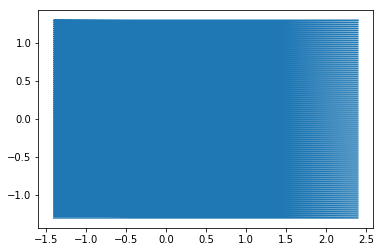

In [59]:
x1 = np.linspace(-1.4,2.4,1000)
x2 = np.linspace(-1.3,1.3,100)
x1, x2 = np.meshgrid(x1, x2,indexing='xy')

x1 = x1.reshape((x1.shape[0]*x1.shape[1], 1))
x2 = x2.reshape((x2.shape[0]*x2.shape[1], 1))

plt.plot(x1,x2)

Xnew = np.concatenate((x1,x2),axis=1)

In [60]:
X_norm = (Xnew-np.mean(X_original,axis=0))/(np.std(X_original,axis=0))
predicted = []
for i in range(0,Xnew.shape[0]):
    predicted.append(np.argmax(Predict(X_norm[i],w_)))

In [61]:
n1 = []
n2 = []
for i in range(0,X_norm.shape[0]):
    if predicted[i]==0:
        n1.append(i)
    else:
        n2.append(i)

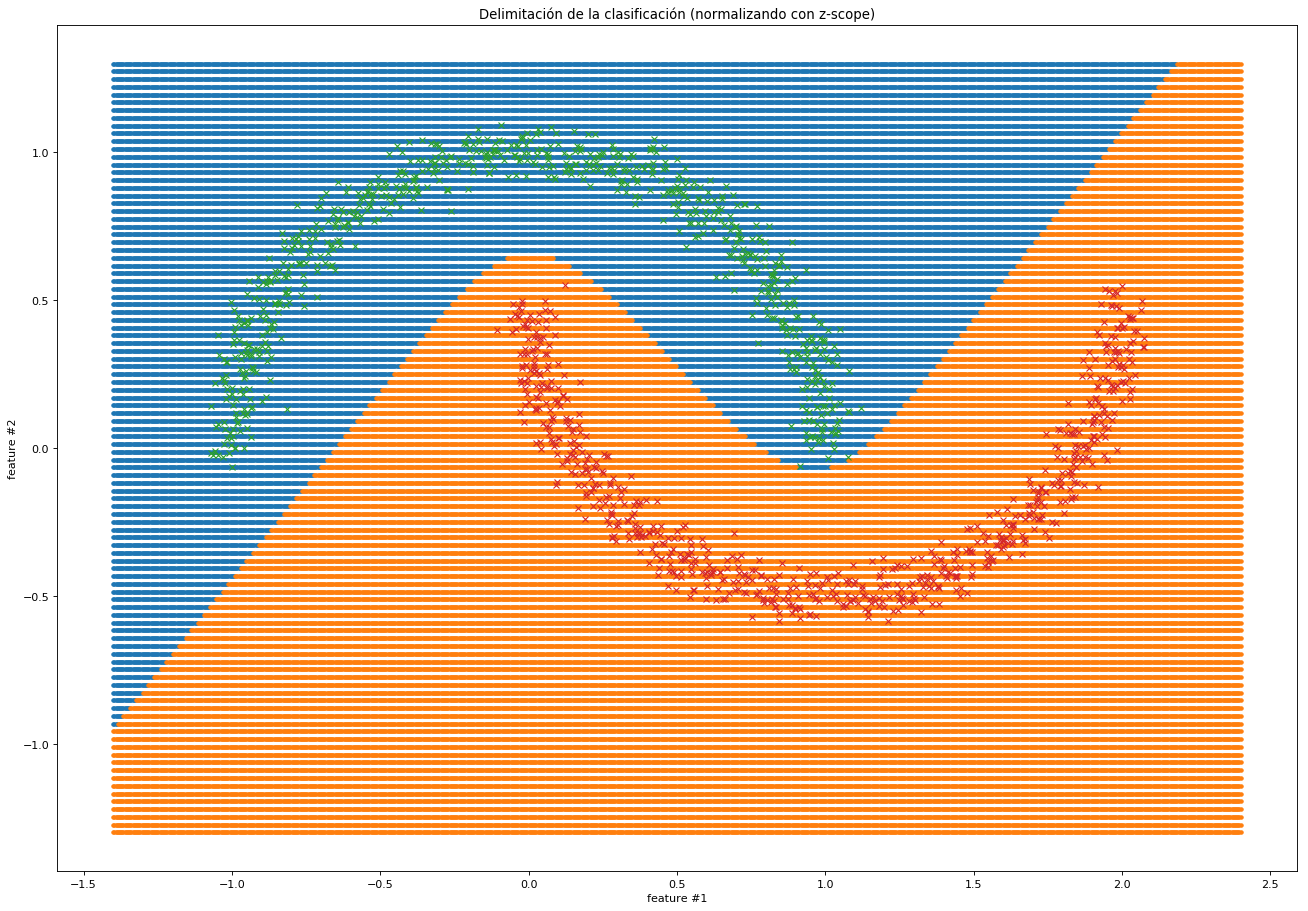

In [62]:
plt.figure(figsize=(20, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(Xnew[n1,0],Xnew[n1,1],'.')
plt.plot(Xnew[n2,0],Xnew[n2,1],'.')
plt.plot(X_original[y==0,0], X_original[y==0,1], 'x')
plt.plot(X_original[y==1,0], X_original[y==1,1], 'x')
plt.title('Delimitación de la clasificación (normalizando con z-scope)')
plt.xlabel('feature #1')
plt.ylabel('feature #2')

plt.show()